### EDA Analysis of HPZ-competition-Land Cover Data


# Abstract:
> This Land cover data set is based on 

# **Data Peprocessing**

#### **Step 1: Import Libraries and Check the data shape**

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [14]:
# Open file
df=pd.read_csv('land_cover_data_11-30-2021.csv')
df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2001,2001,1000 ha,88.1603,FC,Calculated data
1,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2002,2002,1000 ha,88.1818,FC,Calculated data
2,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2003,2003,1000 ha,88.2247,FC,Calculated data
3,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2004,2004,1000 ha,88.2462,FC,Calculated data
4,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2005,2005,1000 ha,88.3106,FC,Calculated data


In [15]:
#find shape
rows,columns=df.shape
print("number of columns: ",columns)    
print("number of rows: ",rows)

number of columns:  14
number of rows:  60760


#### **Step 2: Check the Data Strucutre of each Column** 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60760 entries, 0 to 60759
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       60760 non-null  object 
 1   Domain            60760 non-null  object 
 2   Area Code (ISO3)  60760 non-null  object 
 3   Area              60760 non-null  object 
 4   Element Code      60760 non-null  int64  
 5   Element           60760 non-null  object 
 6   Item Code         60760 non-null  int64  
 7   Item              60760 non-null  object 
 8   Year Code         60760 non-null  int64  
 9   Year              60760 non-null  int64  
 10  Unit              60760 non-null  object 
 11  Value             43400 non-null  float64
 12  Flag              60760 non-null  object 
 13  Flag Description  60760 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 6.5+ MB


#### **Step 3: Deal With Missing Values**

In [17]:
#check missing values
df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (ISO3)        0
Area                    0
Element Code            0
Element                 0
Item Code               0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value               17360
Flag                    0
Flag Description        0
dtype: int64

In [18]:
#percentage of missing values
df.isnull().sum()/df.shape[0]*100

Domain Code          0.000000
Domain               0.000000
Area Code (ISO3)     0.000000
Area                 0.000000
Element Code         0.000000
Element              0.000000
Item Code            0.000000
Item                 0.000000
Year Code            0.000000
Year                 0.000000
Unit                 0.000000
Value               28.571429
Flag                 0.000000
Flag Description     0.000000
dtype: float64

> **Information obtained from step 3**
> - No Column has missing values except Value column
>   
> - Missing values in Value column account for 28%
> 
> - Now we are going to remove na values

##### **Step 3(b) Removing Na values**

In [19]:
# Deal with missing values-Dropping not available data
# df_new.drop(df_new.index[df_new['Flag'] == 'NV'], inplace=True)
df.dropna(inplace=True)



In [20]:
#percentage of missing values
df.isnull().sum()/df.shape[0]*100

Domain Code         0.0
Domain              0.0
Area Code (ISO3)    0.0
Area                0.0
Element Code        0.0
Element             0.0
Item Code           0.0
Item                0.0
Year Code           0.0
Year                0.0
Unit                0.0
Value               0.0
Flag                0.0
Flag Description    0.0
dtype: float64

> **Information obtained from step 3(b)**
> - No Column has missing values Now
>   
> - Now we are going to get the summary of data

### **Step 4:Make new Column of Continent**

In [26]:
#Adding a new column of Continent 
#pip install pycountry_convert
# # #Making new columns of Continent for Visualization

import pycountry_convert as pc
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
# Example
# country_name = 'Chagos Archipelago'
# print(country_to_continent(country_name))
continent=[]
for i in df['Area']:
    
   if i=='Chagos Archipelago':
       continent.append('Africa')
       
   elif i=='Western Sahara':
       continent.append('Africa')
   elif i=='Channel Islands'  :
       continent.append('Europe')
   elif i=='China, Hong Kong SAR'  :
       continent.append('Asia')
   elif i=='China, Macao SAR'  :
       continent.append('Asia')
   elif i=='China, mainland'  :
       continent.append('Asia')
   elif i=='China, Taiwan Province of'  :
       continent.append('Asia')
   elif i=='French Guyana'  :
       continent.append('South America')
   elif i=='French Southern Territories'  :
       continent.append('Antarctica')
   elif i=='Heard and McDonald Islands'  :
       continent.append('Antarctica')
   elif i=='Holy See'  :
       continent.append('Europe')
   elif i=='Iran (Islamic Republic of)'  :
       continent.append('Europe')
   elif i=='Johnston Island'  :
       continent.append('Oceania')
   elif i=='Micronesia (Federated States of)'  :
       continent.append('Oceania')
   elif i=='Midway Island'  :
       continent.append('North America')
   elif i=='Netherlands Antilles (former)'  :
       continent.append('Europe')
   elif i=='Pitcairn'  :
       continent.append('Oceania')
   elif i=='Wake Island'  :
       continent.append('Oceania')
   elif i=='Wallis and Futuna Islands'  :
       continent.append('Oceania')
   elif i=='Republic of Korea'  :
       continent.append('Asia')
   elif i=='Serbia and Montenegro'  :
       continent.append('Europe')
   elif i=='Sudan (former)'  :
       continent.append('Asia')
   elif i=='Timor-Leste'  :
       continent.append('Asia')
   elif i=='Venezuela (Bolivarian Republic of)'  :
       continent.append('South America')
   elif i=='Antarctica' :
       continent.append('Antarctica')
   elif i=='Bolivia (Plurinational State of)' :
       continent.append('South America')
   else:
      continent.append(country_to_continent(i))

df["continent"]=continent


### **Step-5:Summary of Data**

In [27]:
df.describe()

,Item Code,Year Code,Year,Value
count,43400.000000,43400.000000,43400.000000,43400.00000
mean,6976.600000,2009.517281,2009.517281,6387.39671
std,4.029935,5.187285,5.187285,40709.61358
min,6970.000000,2001.000000,2001.000000,0.00000
25%,6974.000000,2005.000000,2005.000000,0.00000
50%,6976.500000,2010.000000,2010.000000,12.93320
75%,6980.000000,2014.000000,2014.000000,464.09740
max,6983.000000,2018.000000,2018.000000,982529.43280


In [ ]:
#get unique values count for each column
c=list(df.columns.values)
for i in c:
  print( i,":", df[ i ].nunique())


Area Code (ISO3) : 244
Area : 244
Item Code : 10
Item : 10
Year Code : 18
Year : 18
Value : 18960
Flag : 2
Flag Description : 2
continent : 7


In [28]:
#checking the number of values in columns 
df.value_counts()

Area                         Item Code  Item                                                        Year Code  Year  Value       continent 
Afghanistan                  6970       Artificial surfaces (including urban and associated areas)  2001       2001  88.1603     Asia          1
North Macedonia              6970       Artificial surfaces (including urban and associated areas)  2007       2007  34.5815     Europe        1
Norfolk Island               6983       Grassland                                                   2017       2017  0.0000      Oceania       1
                                                                                                    2018       2018  0.0000      Oceania       1
North Macedonia              6970       Artificial surfaces (including urban and associated areas)  2001       2001  34.5600     Europe        1
                                                                                                                                       

In [24]:
df.head()

,Area Code (ISO3),Area,Item Code,Item,Year Code,Year,Value,Flag,Flag Description,continent
0,AFG,Afghanistan,6970,Artificial surfaces (including urban and assoc...,2001,2001,88.1603,FC,Calculated data,Asia
1,AFG,Afghanistan,6970,Artificial surfaces (including urban and assoc...,2002,2002,88.1818,FC,Calculated data,Asia
2,AFG,Afghanistan,6970,Artificial surfaces (including urban and assoc...,2003,2003,88.2247,FC,Calculated data,Asia
3,AFG,Afghanistan,6970,Artificial surfaces (including urban and assoc...,2004,2004,88.2462,FC,Calculated data,Asia
4,AFG,Afghanistan,6970,Artificial surfaces (including urban and assoc...,2005,2005,88.3106,FC,Calculated data,Asia


In [25]:
#create a new data frame with selected columns
# Domain code,Domain,element code,element, unit are left because have only 1 value
df=df[['Area','Item Code','Item','Year Code','Year','Value','continent']]

In [29]:
df['continent'].value_counts()

Africa           10420
Asia              9270
Europe            8950
North America     6660
Oceania           4860
South America     2700
Antarctica         540
Name: continent, dtype: int64

In [30]:
#Create dataframe based on continents
df_a=df.loc[df['continent']=='Asia']
df_e=df.loc[df['continent']=='Europe']
df_an=df.loc[df['continent']=='Antarctica']
df_aus=df.loc[df['continent']=='Australia']
df_o=df.loc[df['continent']=='Oceania']
df_s=df.loc[df['continent']=='South America']
df_an=df.loc[df['continent']=='North America']

In [31]:
df['Item'].value_counts()

Artificial surfaces (including urban and associated areas)           4340
Herbaceous crops                                                     4340
Grassland                                                            4340
Tree-covered areas                                                   4340
Mangroves                                                            4340
Shrub-covered areas                                                  4340
Shrubs and/or herbaceous vegetation, aquatic or regularly flooded    4340
Terrestrial barren land                                              4340
Permanent snow and glaciers                                          4340
Inland water bodies                                                  4340
Name: Item, dtype: int64

In [33]:
#create dataframebased on item
Artif=df.loc[df['Item']== 'Artificial surfaces (including urban and associated areas)' ]
Grass=df.loc[df['Item']== 'Grassland']
Tree=df.loc[df['Item']== 'Tree-covered areas']
shrub=df.loc[df['Item']== 'Shrub-covered areas']
flooded=df.loc[df['Item']== 'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded']
terrestrial=df.loc[df['Item']== 'Terrestrial barren land']
snow=df.loc[df['Item']== 'Permanent snow and glaciers']
inland=df.loc[df['Item']== 'Inland water bodies']

# Data Visualization

### Top 30 Countries in world with maximum Tree covered Area

In [34]:
Tree.head()

,Area,Item Code,Item,Year Code,Year,Value,continent
90,Afghanistan,6974,Tree-covered areas,2001,2001,554.8927,Asia
91,Afghanistan,6974,Tree-covered areas,2002,2002,562.0837,Asia
92,Afghanistan,6974,Tree-covered areas,2003,2003,560.0445,Asia
93,Afghanistan,6974,Tree-covered areas,2004,2004,559.8942,Asia
94,Afghanistan,6974,Tree-covered areas,2005,2005,562.5345,Asia


In [47]:
s=Tree.groupby(["Area"]).sum().sort_values(by="Value", ascending=False).head(30)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Russian Federation'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'United States of America'),
  Text(4, 0, 'China'),
  Text(5, 0, 'China, mainland'),
  Text(6, 0, 'Democratic Republic of the Congo'),
  Text(7, 0, 'Indonesia'),
  Text(8, 0, 'Colombia'),
  Text(9, 0, 'Australia'),
  Text(10, 0, 'Mexico'),
  Text(11, 0, 'Peru'),
  Text(12, 0, 'Angola'),
  Text(13, 0, 'Bolivia (Plurinational State of)'),
  Text(14, 0, 'Venezuela (Bolivarian Republic of)'),
  Text(15, 0, 'Argentina'),
  Text(16, 0, 'Mozambique'),
  Text(17, 0, 'Central African Republic'),
  Text(18, 0, 'Zambia'),
  Text(19, 0, 'India'),
  Text(20, 0, 'Myanmar'),
  Text(21, 0, 'United Republic of Tanzania'),
  Text(22, 0, 'Papua New Guinea'),
  Text(23, 0, 'Cameroon'),
  Text(24, 0, 'Sweden'),
  Text(25, 0, 'Paraguay'),
  Text(26, 0, 'Congo'),
  Text(27, 0, 

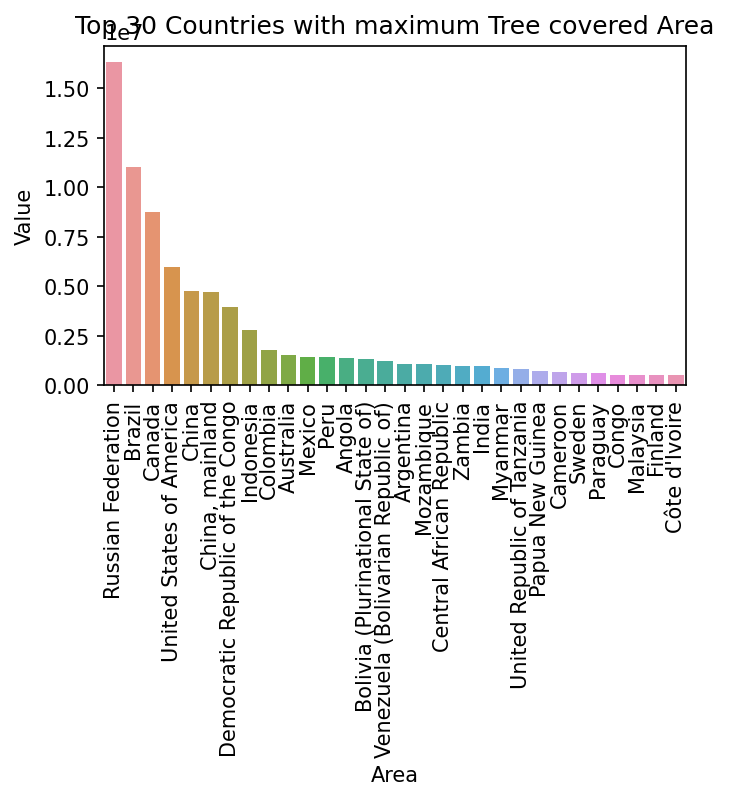

In [46]:
plt.figure(figsize=(5,3), dpi=150, linewidth=2)
pl=sns.barplot(x=s.index,y='Value',data=s).set(title='Top 30 Countries with maximum Tree covered Area')
plt.xticks(rotation=90)

## Top 5 countries in world with snow and glaciers

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Antarctica'),
  Text(1, 0, 'Greenland'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'Russian Federation'),
  Text(4, 0, 'United States of America')])

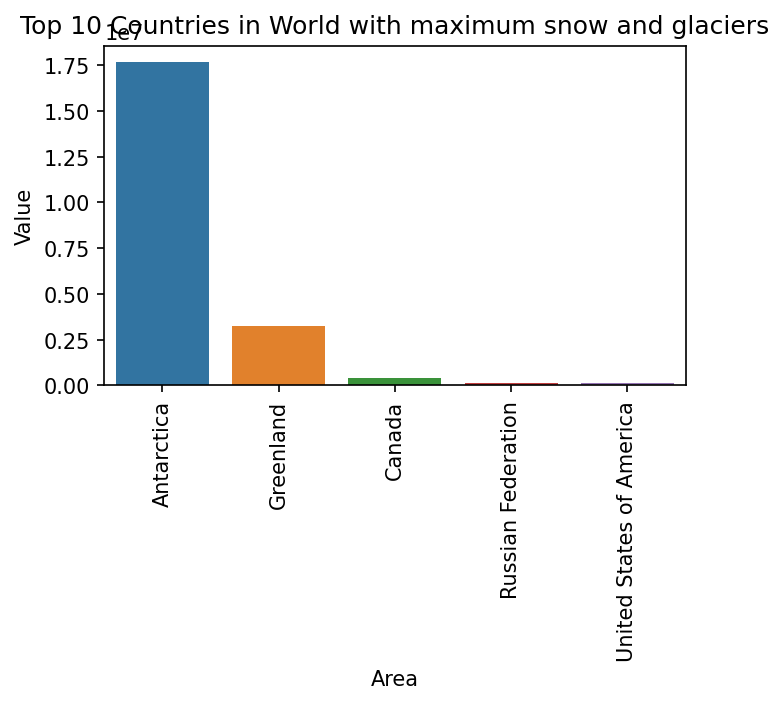

In [50]:
s=snow.groupby(["Area"]).sum().sort_values(by="Value", ascending=False).head(5)
plt.figure(figsize=(5,3), dpi=150, linewidth=2)
pl=sns.barplot(x=s.index,y='Value',data=s).set(title='Top 10 Countries in World with maximum snow and glaciers')
plt.xticks(rotation=90)